In [3]:
!pip install requests beautifulsoup4 pandas


  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 551.2 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/11.1 MB 809.4 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.1 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.4/11.1 MB 1.5 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.1 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ------------- -------------------------- 3.7/11.1 MB 1.7 MB/s eta 0:00:05
   --------------- ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Joy\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
!pip install requests



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Joy\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip


In [3]:
import sys
!{sys.executable} -m pip install pandas



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!{sys.executable} -m pip install pandas



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sys
!{sys.executable} -m pip install beautifulsoup4



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
url = 'https://books.toscrape.com'
response = requests.get(url)
print(response.status_code)

200


In [3]:
#  URL for all 50 pages
url = "https://books.toscrape.com/catalogue/page-{}.html"

In [4]:
import re

In [5]:
# Lists to store data
titles = []
prices = []
availability= []
ratings = []

In [6]:
from bs4 import BeautifulSoup

In [34]:
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to fetch {page_url}")
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    books = []
    
    # Rating map should be outside the loop
    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}

    for book in soup.find_all('article', class_='product_pod'):
        # Title
        title = book.h3.a['title'].strip()
        
        # Price
        price_str = book.find('p', class_='price_color').text.strip()
        price = float(re.sub(r'[^\d.]', '', price_str))
        
        # Availability
        availability = book.find('p', class_='instock availability').text.strip()
        
        # ⭐ Rating (correct extraction)
        rating_tag = book.find('p', class_='star-rating')
        
        if rating_tag:
            rating_class = rating_tag.get('class')[1]  # Example: "Three"
            rating = rating_map.get(rating_class, 0)
        else:
            rating = None  # In case something is missing
        
        books.append({
            'title': title,
            'price': price,
            'availability': availability,
            'rating': rating
        })
    
    return books


In [35]:
ALL_BOOKS = []
base_url = 'https://books.toscrape.com/catalogue/page-{}.html'

for page in range(1, 51):  # Why range(1,51)? Pages start at 1, up to 50.
    page_url = url.format(page)
    print(f"Scraping page {page}...")
    ALL_BOOKS.extend(scrape_page(page_url))

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...


In [36]:
# Convert to DataFrame. Why? Easier analysis.
data1= pd.DataFrame(ALL_BOOKS)
print(f"Total books scraped: {len(data1)}")  # Should be around 1000.
data1.head()  # Why head()? Quick preview.

Total books scraped: 1000


,title,price,availability,rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.10,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5


In [37]:
from bs4 import BeautifulSoup

In [38]:
soup = BeautifulSoup(response.content,'html.parser')

In [39]:
# Find all books on the page
books = soup.find_all("article", class_="product_pod")
books

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

In [40]:
import pandas as pd

In [41]:
# Save to Excel file named using your surname
data1.to_excel("babirye.xlsx", index=False)

print("Scraping complete! Data saved to 'babirye.xlsx'")

Scraping complete! Data saved to 'babirye.xlsx'


(i)loading the data

In [ ]:
#Loading the saved Excel file
data1 = pd.read_excel("babirye.xlsx")


In [ ]:
data1

,title,price,availability,rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.10,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,5
998,1st to Die (Women's Murder Club #1),53.98,In stock,1


(i) Remove unnecessary characters like "£" from price

In [ ]:
data1['price'] = data1['price'].astype(str).str.replace('£', '').str.strip()


In [46]:
#converting to numeric
data1['price'] = pd.to_numeric(data1['price'], errors='coerce')


In [47]:
data1.dtypes


title            object
price           float64
availability     object
rating            int64
dtype: object

In [ ]:
data1

,title,price,availability,rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.1,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,4
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,5
998,1st to Die (Women's Murder Club #1),53.98,In stock,1


In [ ]:
print(data1['price'].head())
print(data1['price'].dtype)


0    51.77
1    53.74
2     50.1
3    47.82
4    54.23
Name: price, dtype: object
object


In [ ]:
#(iii) Standardize the Rating column
# Mapping ratings words to numbers
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

data1['rating'] = data1['rating'].map(rating_map)


In [ ]:
#(iv) Strip extra spaces in Title and Availability columns
data1['title'] = data1['title'].str.strip()
data1['availability'] = data1['availability'].str.strip()


In [52]:
#Handle missing values (if any)
# Check for missing values
print(data1.isnull().sum())



title           0
price           0
availability    0
rating          0
dtype: int64


In [54]:
# Exploring the data
total_books = data1.shape[0]
average_price = data1['price'].mean()

rating_mode = data1['rating'].mode()

# Check if mode result is empty
if not rating_mode.empty:
    most_common_rating = rating_mode.iloc[0]
else:
    most_common_rating = "No rating data"

print(f"Total books: {total_books}")
print(f"Average price: £{average_price:.2f}")
print(f"Most common rating: {most_common_rating}")


Total books: 1000
Average price: £35.07
Most common rating: 1


In [45]:
import sys
!{sys.executable} -m pip install matplotlib 


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351.4 kB/s eta 0:00:22
   -- ------------------------------------- 0.5/8.1 MB 351

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import sys
!{sys.executable} -m pip install  seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


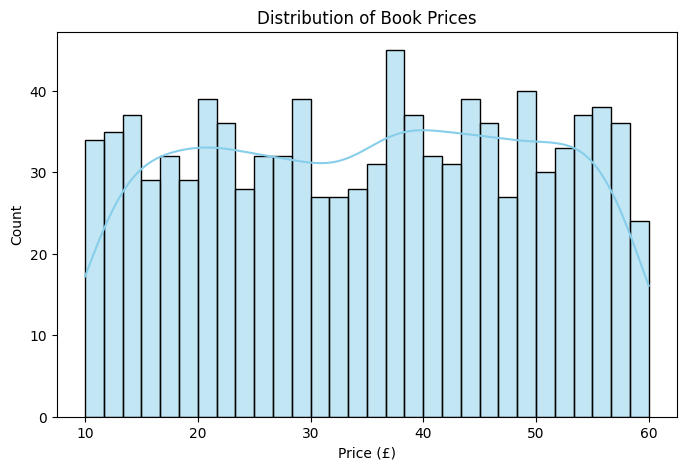

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Distribution of book prices
plt.figure(figsize=(8,5))
sns.histplot(data1['price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Book Prices")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

C:\Users\Joy\AppData\Local\Temp\ipykernel_14804\1384240683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data1, palette='viridis')


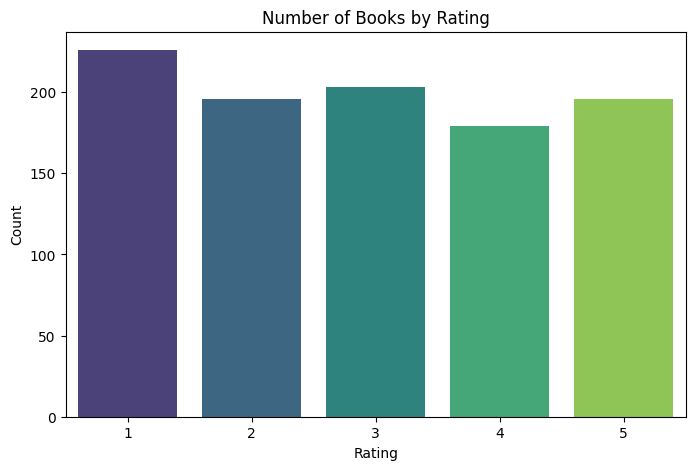

In [58]:
# Count of books by rating
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=data1, palette='viridis')
plt.title("Number of Books by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Most books are cheap or moderately priced (likely under £20).

Rating 3 is the most common, while 5-star books are rarer.

There may be a slight correlation between price and rating (higher-rated books might cost more).

In [60]:
print(data1[['price', 'rating']].corr())


           price    rating
price   1.000000  0.028166
rating  0.028166  1.000000


In [61]:
data1.to_excel("books_babirye_cleaned.xlsx", index=False)
print("Cleaned dataset saved as books_babirye_cleaned.xlsx")


Cleaned dataset saved as books_babirye_cleaned.xlsx
